# van der Waals Equation
- $R\cdot T = (P + \frac{a \cdot n^2}{v^2})(V- b \cdot n)$
- $P = \frac{R\cdot T}{V-B} - \frac{a}{V^2}$

where,
- V := Volume
- T := Temperature at pressure P
- P := Pressure 
- a, b := van der Waals constants
    - a provides a measure of the average attraction of the molecules,
    - b adjusts for the volume occupied by the gas particle
- R := 8.314462618... kg⋅m2⋅s−2⋅K−1⋅mol−1. (Adjust this accordingly)

In [47]:
import numpy as np

def van_der_waals(V, P, T, a, b, n, R=0.0821):
    """
    Computes the van der Waals equation adjusted to zero.
    """
    return P * V**3 - (P * n * b + n * R * T) * V**2 + a * n**2 * V - a * n**3 * b

def derivative_van(V, P, T, a, b, n, R=0.0821):
    """
    Computes the derivative of the van der Waals equation with respect to V.
    """
    return 3 * P * V**2 - 2 * (P * n * b + n * R * T) * V + a * n**2

## Bisection Method
- over an interval [a,b] we want to find check if $f(a) \cdot f(b) < 0$
- then we need to find the midpoint, $c = \frac{a + b}{2}$
- next we will check if the signs are the same for f(a) and f(c) or check if f(b) anf f(c) have the same signs

In [55]:
import numpy as np

def van_der_waals(V, P, T, a, b, n, R=0.0821):
    return P * V**3 - (P  * n * b + n * R * T )* V**2 + a * n**2 * V - a * n**3 * b

def bisection(f, a, b, TOL, count=0):
    '''
    This function will return the root for a given function f. 
    REQUIRED: f(a)*f(b) < 0.
    |f(c)| < tol with c the midpoint.
    between a and b Recursive implementation
    params:
    - f: defined as the function we want to find a root for that is continuous and f(a)*f(b) < 0
    '''

    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")
    
    c = (a + b)/2
    count += 1  # Increment the count

    if np.abs(f(c)) < TOL:
        return c, count  # Return the root and the count
    
    elif np.sign(f(a)) == np.sign(f(c)):
        return bisection(f, c, b, TOL, count)
    
    elif np.sign(f(b)) == np.sign(f(c)):
        return bisection(f, a, c, TOL, count)

# Parameters for finding the volume using van der Waals equation
P = 120  # Pressure in atm
T = 696  # Temperature in Kelvin
a = 0.0341  # Attraction parameter in bar L^2/mol^2
b = 0.0237  # Volume correction in L/mol
n = 20  # Number of moles

f = lambda V: van_der_waals(V, P=P, T=T, a=a, b=b, n=n)

root, iterations = bisection(f, 0.1, 20, TOL=10e-10)
print(f"The root by bisection method is: {root}")
print(f"Number of iterations: {iterations}")


The root by bisection method is: 9.986758471866366
Number of iterations: 45


## Newtons Method
$$x_{n+1} = x_n - \frac{f(x_n)}{f^{\prime}(x_n)}$$
- where f is differentiable and continuous
By expanding out our van der Waals equation, we get

- $f(V) = P\cdot V^3 - V^2(P \cdot b \cdot n + R \cdot T \cdot) - (a \cdot V \cdot n) - (a \cdot b \cdot n^3)$
- $f^\prime(V) = 3\cdot p \cdot V^2 - 2(P\cdot n \cdot b - R\cdot T \cdot n)V + a\cdot n^2$

Example from Question 3 link: https://scilearn.sydney.edu.au/fychemistry/Questions/GasLaws(advanced).htm#A3

In [49]:
import numpy as np

def newtons_method(f, f_prime, x0, tol=10e-10, max_iterations=100, verbose=False):
    """
    Applies Newton's method to find the root of the equation f(x) = 0.
    """
    x = x0
    converged = False

    for i in range(max_iterations):
        fx = f(x)
        fpx = f_prime(x)

        # Check if derivative is zero
        if fpx == 0:
            raise ValueError(f"Derivative is zero at V = {x}.")
        
        # Update x
        x_new = x - fx / fpx

        # Check convergence criteria
        if np.abs(f(x_new)) < tol and np.abs(x_new - x) / np.abs(x) < tol:
            converged = True
            x = x_new
            break

        x = x_new

        if verbose:
            print(f"Iteration {i}: V = {x}, f(V) = {fx}")

    # Final convergence check
    if not converged:
        print("Warning: Newton's method did not converge after the maximum number of iterations.")
    
    return x, i + 1, converged


# Parameters for finding the volume using van der Waals equation
P = 120  # Pressure in atm
T = 696  # Temperature in Kelvin
a = 0.0341  # Attraction parameter in L^2 / ATM / mol^2
b = 0.0237  # Volume correction in L/mol
n = 20  # Number of moles

# Initial guess for V (in L).
x0 = 10

# Define the function and its derivative
f = lambda V: van_der_waals(V, P=P, T=T, a=a, b=b, n=n)
f_prime = lambda V: derivative_van(V, P=P, T=T, a=a, b=b, n=n)

# Apply Newton's method
root, iterations, has_converged = newtons_method(f=f, f_prime=f_prime, x0=x0, verbose=True)
# Output the results
if has_converged:
    print(f"Newton's Method converged: {root} L after {iterations} iterations.")
else:
    print(f"Newton's Method did not converge after {iterations} iterations.")

Iteration 0: V = 9.986793463900028, f(V) = 158.73464000000288
Iteration 1: V = 9.986758472111676, f(V) = 0.4183640542999614
Newton's Method converged: 9.986758471866347 L after 3 iterations.


## Results
- increasing the tolerance from 10e-8 to 10e-10 with an error of 

## Secant method (Newtons but with quotient difference instead of $f^{\prime}(x_n)$)

$$x_{n+1} = x_n - f(x_n)\frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$$

In [50]:
import numpy as np

def secant_method(f, x0, x1, tol, max_iterations, verbose=False):
    '''
    Uses the Secant method to find a root of a function.
    
    Parameters:
    - f: The function for which to find the root.
    - x0, x1: The initial two guesses for the root.
    - tol: The tolerance for the convergence of the method.
    - max_iterations: The maximum number of iterations to perform.
    - verbose: Whether to print the process (default: False).
    
    Returns:
    - A dictionary with the root, the number of iterations, and a flag indicating convergence.
    '''
    
    if tol <= 0:
        raise ValueError("Tolerance must be positive.")
    
    for i in range(max_iterations):
        f_x0 = f(x0)
        f_x1 = f(x1)
        denominator = (f_x1 - f_x0)
        
        # Avoid division by zero
        if denominator == 0:
            print("Warning: Division by zero encountered in the Secant method.")
            return {"root": None, "iterations": i, "converged": False}

        x_new = x1 - (f_x1 * (x1 - x0) / denominator)
        
        if verbose:
            print(f"Iteration {i+1}: x = {x_new}, f(x) = {f(x_new)}")
        
        if np.abs(x_new - x1) < tol:
            return {"root": x_new, "iterations": i + 1, "converged": True}
        
        x0, x1 = x1, x_new
        
    return {"root": x1, "iterations": max_iterations, "converged": False}

# Parameters for finding the root using the van der Waals equation
x0, x1 = 5, 15
P = 120  # Pressure in atm
T = 696  # Temperature in Kelvin
a = 0.0341  # Attraction parameter in L^2 / ATM / mol^2
b = 0.0237  # Volume correction in L/mol
n = 20  # Number of moles

# Define the function using the van der Waals equation
f = lambda V: van_der_waals(V, P=P, T=T, a=a, b=b, n=n)

# Apply the Secant method
result = secant_method(f, x0=x0, x1=x1, tol=10e-8, max_iterations=100, verbose=True)

# Output the results
if result["converged"]:
    print(f"The Secant Method converged: {result['root']} after {result['iterations']} iterations.")
else:
    print(f"The Secant Method did not converge after {result['iterations']} iterations.")


Iteration 1: x = 5.994118630571128, f(x) = -17185.855543478756
Iteration 2: x = 7.009369562181895, f(x) = -17528.72134379815
Iteration 3: x = -44.894467617433975, f(x) = -13276901.398101257
Iteration 4: x = 7.077985772071692, f(x) = -17461.900529807575
Iteration 5: x = 7.146430430802842, f(x) = -17382.597865397587
Iteration 6: x = 22.149028232650537, f(x) = 715644.5672827512
Iteration 7: x = 7.5021936779576865, f(x) = -16757.98296515192
Iteration 8: x = 7.837325503861162, f(x) = -15822.603044451926
Iteration 9: x = 13.506313827733656, f(x) = 76985.12602143365
Iteration 10: x = 8.80381991995219, f(x) = -10989.5738993459
Iteration 11: x = 9.39124339917206, f(x) = -6295.71618040355
Iteration 12: x = 10.17913509174488, f(x) = 2389.544518194017
Iteration 13: x = 9.962365285949414, f(x) = -290.21873862983745
Iteration 14: x = 9.985841486487203, f(x) = -10.96136776230568
Iteration 15: x = 9.986762970732926, f(x) = 0.05378803013644973
Iteration 16: x = 9.986758471039657, f(x) = -9.883811197930

In [51]:
import numpy as np
import time

# Newton's Method

def newtons_method(f, df, x0, tol=1e-8, max_iterations=100):
    start_time = time.time()
    for i in range(max_iterations):
        x1 = x0 - f(x0)/df(x0)
        if np.abs(x1 - x0) < tol:
            return x1, i+1, time.time() - start_time
        x0 = x1
    return x0, max_iterations, time.time() - start_time

# Secant Method

def secant_method(f, x0, x1, tol=1e-8, max_iterations=100):
    start_time = time.time()
    for i in range(max_iterations):
        x2 = x1 - f(x1) * ((x1 - x0) / (f(x1) - f(x0)))
        if np.abs(x2 - x1) < tol:
            return x2, i+1, time.time() - start_time
        x0, x1 = x1, x2
    return x1, max_iterations, time.time() - start_time

# Parameters for finding the volume using van der Waals equation
P = 120  # Pressure in atm
T = 696  # Temperature in Kelvin
a = 0.0341  # Attraction parameter in L^2 / ATM / mol^2
b = 0.0237  # Volume correction in L/mol
n = 20  # Number of moles

# Initial guess for V (in L).
x0 = 7.5

# Define the function and its derivative
f = lambda V: van_der_waals(V, P=P, T=T, a=a, b=b, n=n)
f_prime = lambda V: derivative_van(V, P=P, T=T, a=a, b=b, n=n)

# Run both methods
newton_root, newton_iters, newton_time = newtons_method(f, f_prime, x0=12)
secant_root, secant_iters, secant_time = secant_method(f, x0=0.1, x1=20)

# Compare results
print(f"Newton's Method: Root = {newton_root}, Iterations = {newton_iters}, Time = {newton_time} seconds")
print(f"Secant Method: Root = {secant_root}, Iterations = {secant_iters}, Time = {secant_time} seconds")

# Vary initial conditions and repeat the comparison

Newton's Method: Root = 9.986758471866345, Iterations = 6, Time = 3.886222839355469e-05 seconds
Secant Method: Root = 0.06891775432407876, Iterations = 100, Time = 0.0003380775451660156 seconds


Ideas for comparing efficiency
- Comparing the time difference to calculate the root
- Comparing the error between true and predicted values
- Comparing the sensitivity of the initial guess
- Obviously ease of Use

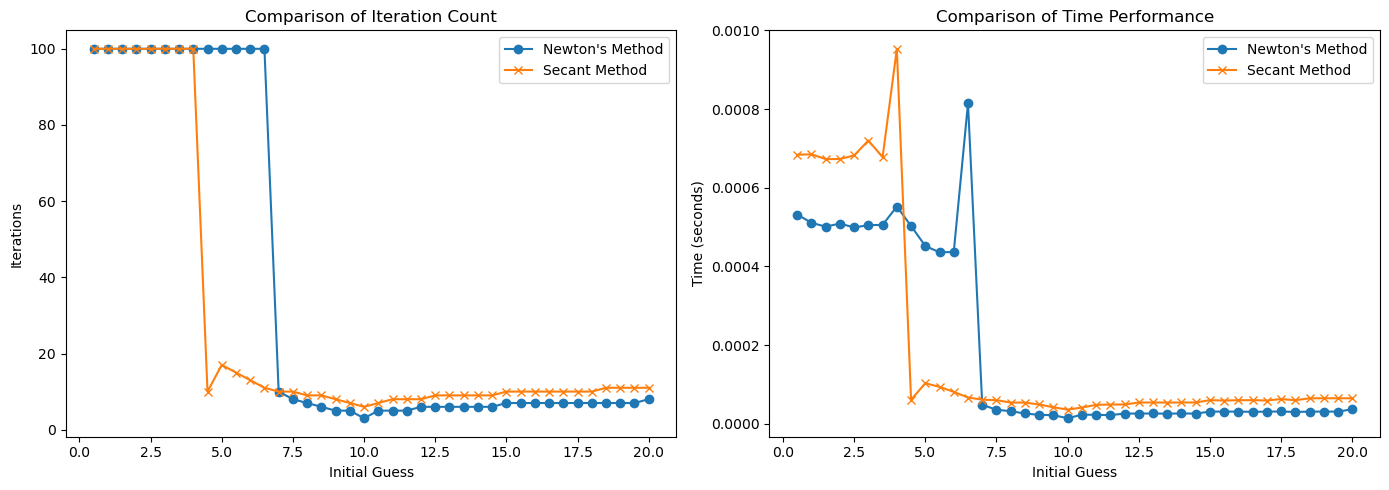

In [54]:
import matplotlib.pyplot as plt

# Running both methods with initial guesses and storing the results
initial_guesses = np.linspace(0.5, 20, 40)  # Varying initial guesses for both methods
newton_results = [newtons_method(f, f_prime, x0=guess) for guess in initial_guesses]
secant_results = [secant_method(f, x0=guess, x1=guess+10) for guess in initial_guesses]

# Extracting iterations and times for plotting
newton_iters = [result[1] for result in newton_results]
newton_times = [result[2] for result in newton_results]
secant_iters = [result[1] for result in secant_results]
secant_times = [result[2] for result in secant_results]

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Iterations subplot
ax1.plot(initial_guesses, newton_iters, label='Newton\'s Method', marker='o')
ax1.plot(initial_guesses, secant_iters, label='Secant Method', marker='x')
ax1.set_title('Comparison of Iteration Count')
ax1.set_xlabel('Initial Guess')
ax1.set_ylabel('Iterations')
ax1.legend()

# Time subplot
ax2.plot(initial_guesses, newton_times, label='Newton\'s Method', marker='o')
ax2.plot(initial_guesses, secant_times, label='Secant Method', marker='x')
ax2.set_title('Comparison of Time Performance')
ax2.set_xlabel('Initial Guess')
ax2.set_ylabel('Time (seconds)')
ax2.legend()

plt.tight_layout()
plt.show()